In [49]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Preprocess the data (these are NumPy arrays)
x_train = x_train.reshape(60000, 784).astype("float32") / 255
x_test = x_test.reshape(10000, 784).astype("float32") / 255

y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

# Reserve 10,000 samples for validation
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

def get_uncompiled_model():
    inputs = keras.Input(shape=(784,), name="digits")
    x = layers.Dense(64, activation="relu", name="dense_1")(inputs)
    x = layers.Dense(64, activation="relu", name="dense_2")(x)
    outputs = layers.Dense(10, activation="softmax", name="predictions")(x)
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

def get_compiled_model():
    model = get_uncompiled_model()
    model.compile(
        optimizer="rmsprop",
        loss="sparse_categorical_crossentropy",
        metrics=["sparse_categorical_accuracy"],
    )
    return model


model = get_compiled_model()

# Prepare the training dataset
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(64)

# Only use the 100 batches per epoch (that's 64 * 100 samples)
model.fit(train_dataset, epochs=3, steps_per_epoch=100)

Epoch 1/3
100/100 [==============================] - 1s 2ms/step - loss: 1.2092 - sparse_categorical_accuracy: 0.6751
Epoch 2/3
100/100 [==============================] - 0s 2ms/step - loss: 0.3896 - sparse_categorical_accuracy: 0.8880
Epoch 3/3
100/100 [==============================] - 0s 2ms/step - loss: 0.3540 - sparse_categorical_accuracy: 0.8945


In [73]:
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(64)
for elem in train_dataset:
    print(elem[1])
    break

tf.Tensor(
[0. 1. 8. 6. 5. 5. 7. 5. 1. 7. 5. 9. 8. 4. 6. 2. 4. 0. 0. 6. 8. 4. 3. 6.
 5. 3. 7. 5. 0. 9. 0. 5. 1. 0. 3. 8. 6. 4. 1. 9. 1. 4. 0. 2. 9. 4. 1. 9.
 6. 9. 7. 3. 8. 8. 9. 2. 4. 3. 9. 7. 8. 8. 6. 6.], shape=(64,), dtype=float32)


In [78]:
history = model.fit(train_dataset, epochs=3, steps_per_epoch=100)

Epoch 1/3
100/100 [==============================] - 0s 4ms/step - loss: 0.1308 - sparse_categorical_accuracy: 0.9625
Epoch 2/3
100/100 [==============================] - 1s 7ms/step - loss: 0.1481 - sparse_categorical_accuracy: 0.9542
Epoch 3/3
100/100 [==============================] - 0s 4ms/step - loss: 0.1282 - sparse_categorical_accuracy: 0.9620


In [63]:
for elem in train_dataset:
    print(elem)
    break

(<tf.Tensor: shape=(64, 784), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)>, <tf.Tensor: shape=(64,), dtype=float32, numpy=
array([7., 3., 0., 2., 8., 2., 4., 4., 0., 9., 7., 0., 6., 9., 7., 0., 9.,
       7., 0., 9., 1., 8., 0., 5., 1., 5., 5., 6., 7., 7., 0., 2., 7., 5.,
       1., 9., 6., 6., 3., 0., 9., 2., 5., 1., 7., 5., 4., 0., 1., 1., 7.,
       2., 7., 9., 5., 9., 9., 3., 5., 8., 8., 7., 4., 1.], dtype=float32)>)


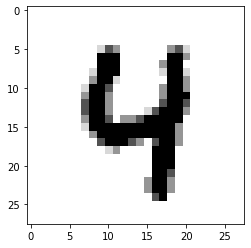

In [57]:
import matplotlib.pyplot as plt

plt.imshow(elem[0][0,:].numpy().reshape(28, 28), cmap="Greys")

In [44]:
elem[0][0,:]

<tf.Tensor: shape=(784,), dtype=float32, numpy=
array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.     

In [46]:
elem[1]

<tf.Tensor: shape=(64,), dtype=float32, numpy=
array([1., 4., 4., 9., 7., 6., 8., 1., 0., 5., 1., 4., 9., 9., 0., 3., 9.,
       6., 2., 3., 8., 1., 3., 1., 4., 4., 2., 2., 2., 7., 1., 5., 1., 7.,
       7., 7., 9., 2., 6., 0., 4., 5., 6., 8., 6., 8., 9., 9., 3., 2., 6.,
       7., 0., 1., 4., 0., 2., 0., 4., 4., 3., 5., 0., 9.], dtype=float32)>

In [74]:
outer_list = [[1,0,1],
 [1,1,1],
 [0,0,0]]

In [77]:
[[bool(inner_entry) for inner_entry in inner_list] for inner_list in outer_list]

[[True, False, True], [True, True, True], [False, False, False]]

In [ ]:
def print_bag():
    model.evaluate()